## Image Classification (Sunflowers vs Otherflowers)

## library


In [ ]:
#conda install torchvision -c pytorch
#conda install pytorch torchvision cudatoolkit=9.0 -c pytorch
#conda install -c peterjc123 pytorch
#python setup.py install
#conda install scikit-learn
#conda install PyTorch torchvision -c PyTorch
#conda install -c conda-forge tqdm
#conda install -c conda-forge/label/gcc7 tqdm
#conda install -c conda-forge/label/cf201901 tqdm
#conda install -c conda-forge python-utils
#conda install -c conda-forge/label/gcc7 python-utils
#conda install -c conda-forge/label/cf201901 python-utils
#conda install -c auto import-utils
#conda install -c auto key-train
#conda install -c peterjc123 pytorch cuda80
#pip install torchvision
#pip install torchtext
!pip install torch
!pip install torchvision
!pip install bcolz

     |████████████████████████████████| 1.5MB 6.5MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2663575 sha256=0ef4a9e7c9119d2d71a439599df0dcf9afa7168001d587d496f17be4789d7035
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

# some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

## dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls 'drive/My Drive'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'Colab Notebooks'
 created.txt
 Deep-Learning-predicting-breast-cancer-tumor-malignancy-master
'Files_Online2PDF (1)'
 flowersall
'jpg to word'
 my_project_works-master
 Project
 Projectcalss
 Projectflowers
 ProjectFlowersAsli
 ProjectISIC
 psample
 voice


In [ ]:
DATA_DIR = '/content/drive/My Drive/Projectcalss/Project/datasets/flowers/dev'
sz = 224
batch_size = 16

In [ ]:
os.listdir(DATA_DIR)

['valid', 'train']

In [ ]:
trn_dir = f'{DATA_DIR}train'
val_dir = f'{DATA_DIR}valid'

In [ ]:
os.listdir('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train')

['OtherFlower', 'Sunflower']

In [ ]:
trn_fnames = glob.glob('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/*/*.jpg')
trn_fnames[:20]

['drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1183).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1182).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1189).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1181).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1187).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1188).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1191).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1195).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1193).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1199).jpg',
 'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (

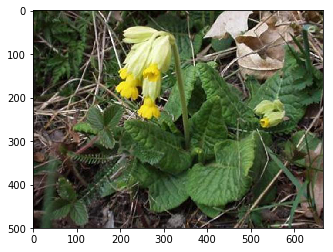

In [ ]:
img = plt.imread(trn_fnames[16])
plt.imshow(img);

### Datasets and Dataloaders in PyTorch

In [ ]:
train_ds = datasets.ImageFolder('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train')

In [ ]:
train_ds.classes

['OtherFlower', 'Sunflower']

In [ ]:
train_ds.class_to_idx

{'OtherFlower': 0, 'Sunflower': 1}

In [ ]:
train_ds.root

'drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train'

In [ ]:
train_ds.imgs

[('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1001).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1002).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1003).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1005).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1007).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1008).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1009).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1011).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1012).jpg',
  0),
 ('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train/OtherFlower/1 (1013).jpg',
  0),
 ('drive/M

In [ ]:
type(train_ds.transform)

NoneType

### Transformations

In [ ]:
tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/train', transform=tfms)
valid_ds = datasets.ImageFolder('drive/My Drive/Projectcalss/Project/datasets/flowers/dev/valid', transform=tfms)

In [ ]:
train_ds[0]

(tensor([[[-2.0323, -1.9638, -1.8782,  ..., -1.5528, -1.6727, -1.7583],
          [-2.0323, -1.9638, -1.8782,  ..., -1.6213, -1.7240, -1.7583],
          [-2.0323, -1.9467, -1.8782,  ..., -1.6727, -1.7583, -1.7412],
          ...,
          [-0.8164, -0.4397, -0.0287,  ..., -1.9124, -1.9295, -1.9295],
          [-0.8335, -0.4226, -0.0458,  ..., -1.9295, -1.9638, -1.9467],
          [-0.8678, -0.4568, -0.0801,  ..., -1.9467, -1.9638, -1.9467]],
 
         [[-1.8081, -1.8081, -1.7906,  ..., -1.4580, -1.5805, -1.6506],
          [-1.8081, -1.7906, -1.7906,  ..., -1.5280, -1.6155, -1.6506],
          [-1.8081, -1.7906, -1.7906,  ..., -1.5805, -1.6506, -1.6331],
          ...,
          [-0.7402, -0.3725, -0.0224,  ..., -1.8782, -1.8957, -1.8957],
          [-0.7402, -0.3725, -0.0399,  ..., -1.8606, -1.8782, -1.8606],
          [-0.7752, -0.4076, -0.0924,  ..., -1.8606, -1.8782, -1.8606]],
 
         [[-1.6476, -1.6476, -1.5953,  ..., -1.2467, -1.3861, -1.5081],
          [-1.6650, -1.6302,

In [ ]:
len(train_ds), len(valid_ds)

(1287, 159)

#### Dataloaders

In [ ]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,
                                       shuffle=True, num_workers=8)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size,
                                       shuffle=True, num_workers=8)

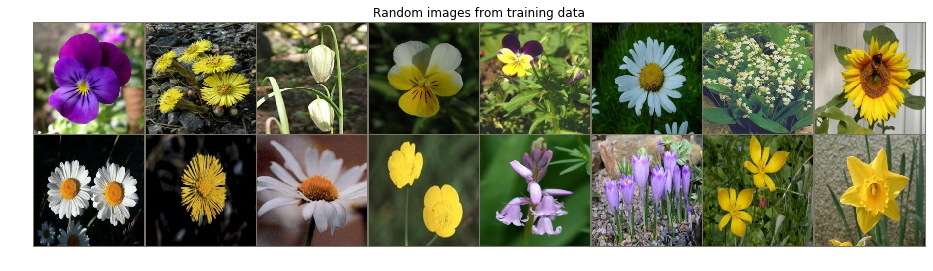

In [ ]:
inputs, targets = next(iter(train_dl))
out = torchvision.utils.make_grid(inputs, padding=3)
plt.figure(figsize=(16, 12))
imshow(out, title='Random images from training data')

## Model: CNN

<img src='imgs/car-CNN.jpg' width='100%'/>

In [ ]:
class SimpleCNN(nn.Module):

    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Linear(56 * 56 * 32, 2)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)            # (bs, C, H,  W)
        out = out.view(out.size(0), -1)  # (bs, C * H, W)
        out = self.fc(out)
        return out

In [ ]:
model = SimpleCNN()

# transfer model to GPU
if use_gpu:
    model = model.cuda()

In [ ]:
model

SimpleCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=100352, out_features=2, bias=True)
)

## Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

## Train

In [ ]:
num_epochs = 10
losses = []
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = to_var(inputs)
        targets = to_var(targets)

        # forwad pass
        optimizer.zero_grad()
        outputs = model(inputs)

        # loss
        loss = criterion(outputs, targets)
        losses += [loss.data.item()]
        # backward pass
        loss.backward()

        # update parameters
        optimizer.step()

        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.data.item()))

Epoch [ 1/10], Step [ 50/ 80], Loss: 0.0001
Epoch [ 2/10], Step [ 50/ 80], Loss: 0.0081
Epoch [ 3/10], Step [ 50/ 80], Loss: 0.0001
Epoch [ 4/10], Step [ 50/ 80], Loss: 0.0002
Epoch [ 5/10], Step [ 50/ 80], Loss: 0.0016
Epoch [ 6/10], Step [ 50/ 80], Loss: 0.0000
Epoch [ 7/10], Step [ 50/ 80], Loss: 0.0018
Epoch [ 8/10], Step [ 50/ 80], Loss: 0.0002
Epoch [ 9/10], Step [ 50/ 80], Loss: 0.0001
Epoch [10/10], Step [ 50/ 80], Loss: 0.0001


In [ ]:
list(outputs)

[tensor([ 8.7542, -8.7912], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 11.8300, -11.8190], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 9.3885, -9.3868], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 9.0371, -9.2166], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 8.2245, -8.1883], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 7.2506, -7.1427], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 6.0764, -6.1008], device='cuda:0', grad_fn=<SelectBackward>)]

In [ ]:
outputs.flatten()

tensor([  8.7542,  -8.7912,  11.8300, -11.8190,   9.3885,  -9.3868,   9.0371,
         -9.2166,   8.2245,  -8.1883,   7.2506,  -7.1427,   6.0764,  -6.1008],
       device='cuda:0', grad_fn=<AsStridedBackward>)

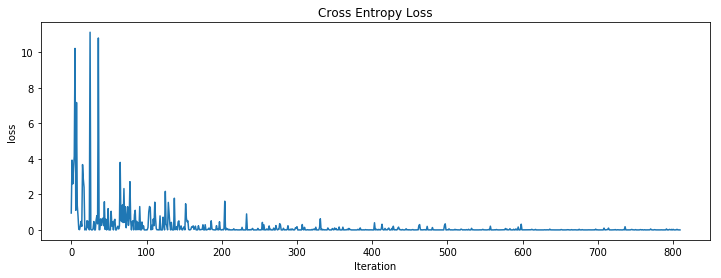

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss');

### Analyze results

#### Accuracy on validation data

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()  # for batch normalization layers
    corrects = 0
    for inputs, targets in dataloader:
        inputs, targets = to_var(inputs, True), to_var(targets, True)
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        corrects += (preds == targets.data).sum()

    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))

In [ ]:
evaluate_model(model, valid_dl)

/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


accuracy: 85.00


In [ ]:
evaluate_model(model, train_dl)

/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


accuracy: 100.00


/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


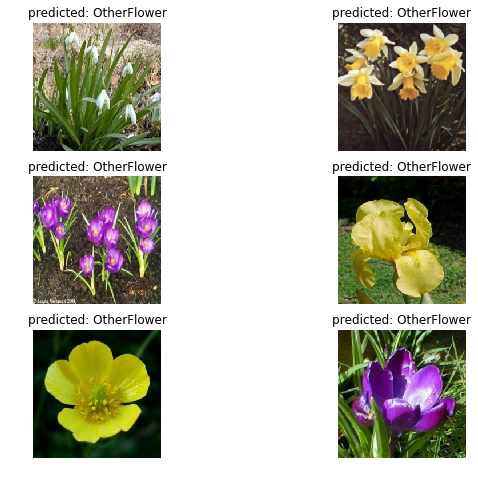

In [ ]:
visualize_model(model, train_dl)

/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


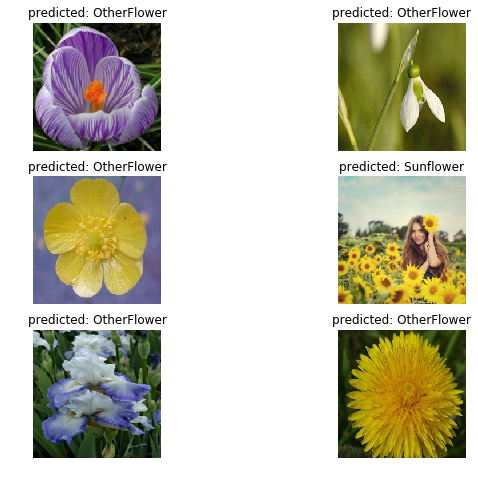

In [ ]:
visualize_model(model, valid_dl)

  0%|          | 0/10 [00:00<?, ?it/s]/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)
100%|██████████| 10/10 [00:02<00:00,  3.08it/s]


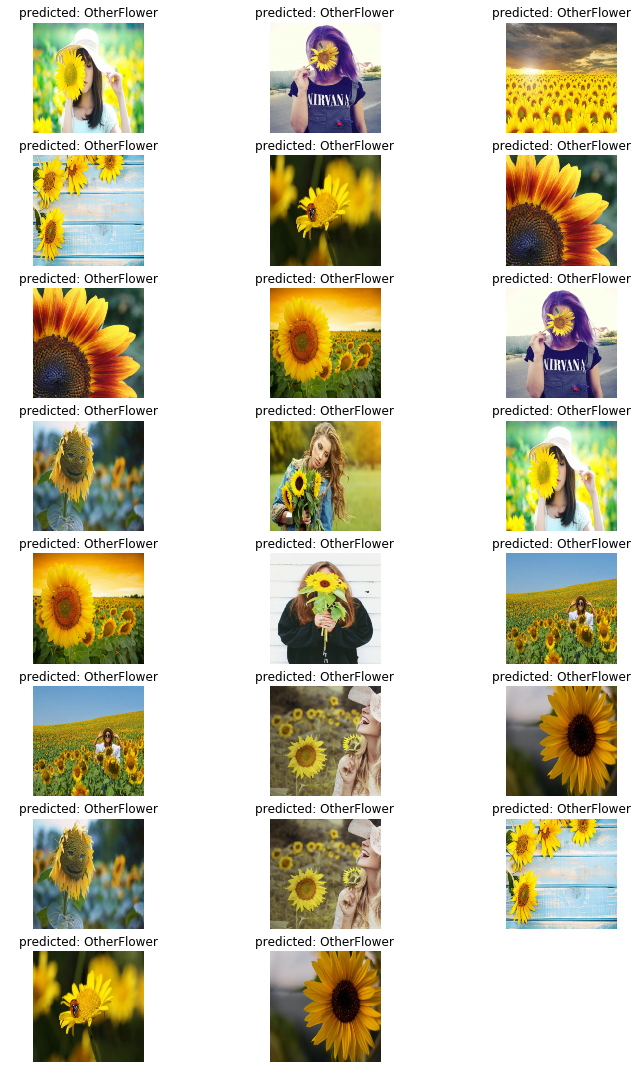

23 images out of 159 were misclassified.


In [ ]:
plot_errors(model, valid_dl)

#### Confusion matrix

  0%|          | 0/10 [00:00<?, ?it/s]/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)
100%|██████████| 10/10 [00:01<00:00,  2.01it/s]


[[1.   0.  ]
 [0.43 0.57]]


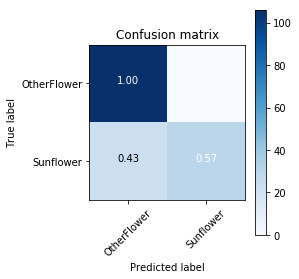

In [ ]:
y_pred, y_true = predict_class(model, valid_dl)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, train_ds.classes, normalize=True, figsize=(4, 4))

In [ ]:
# load pre-trained ResNet18
model = load_pretrained_resnet50(model_path=None, num_classes=2)

# loss and optimizer
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 86175399.90it/s]
